**Problem**    
Build a machine learning model that predicts the genre of a song directly from Spotify data, using its audio features obtained through the Spotify API.




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [4]:
data = pd.read_csv("spotify_songs.csv", encoding="utf-8")
display(data.head())

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66.0,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6.0,-2.634,1.0,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67.0,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11.0,-4.969,1.0,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70.0,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-3.432,0.0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60.0,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7.0,-3.778,1.0,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69.0,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-4.672,1.0,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0


# cleaning dataset

In [5]:
df = data.drop_duplicates().dropna()
print(len(data),len(df))


30428 30422


Il n'y a presque pas de musiques qui partagent toutes les memes caractéristiques mais regardons via l'id des tracks si il y a des doublons.

In [6]:
df.groupby("track_id").size().sort_values(ascending=False).head(10)

,0
track_id,
3eekarcy7kvN4yt5ZFzltW,9
7BKLCZ1jbUBVqRi2FVlTVw,9
14sOS5L36385FJ3OL8hew4,9
6wo37KVqFJhtuxPTpLCcfe,8
56AMYGJzxBO6p8v0wEe9de,8
3ZCTVFBt2Brf31RLEnCkWJ,8
7h0d2h0fUmzbs7zeFigJPn,8
6oJ6le65B3SEqPwMRNXWjY,8
0rIAC4PXANcKmitJfoqmVm,8


Affichons les caractéristiques de la chanson la plus présente pour voir quelles sont les différences

In [7]:
df.loc[df.track_id == df.groupby("track_id").size().sort_values(ascending=False).index[0], :]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1303,3eekarcy7kvN4yt5ZFzltW,HIGHEST IN THE ROOM,Travis Scott,94.0,2uDTi1PlpSpvAv7IRAoAEU,HIGHEST IN THE ROOM,2019-10-04,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,7.0,-8.764,0.0,0.0317,0.0546,0.000006,0.21,0.0605,76.469,175721.0
6209,3eekarcy7kvN4yt5ZFzltW,HIGHEST IN THE ROOM,Travis Scott,94.0,2uDTi1PlpSpvAv7IRAoAEU,HIGHEST IN THE ROOM,2019-10-04,Hip-Hop Favourites,37i9dQZF1DX48TTZL62Yht,rap,...,7.0,-8.764,0.0,0.0317,0.0546,0.000006,0.21,0.0605,76.469,175721.0
8981,3eekarcy7kvN4yt5ZFzltW,HIGHEST IN THE ROOM,Travis Scott,94.0,2uDTi1PlpSpvAv7IRAoAEU,HIGHEST IN THE ROOM,2019-10-04,GTA San Andreas Radio Los Santos,6m0BqpJfSP2m5xCOFjDRHw,rap,...,7.0,-8.764,0.0,0.0317,0.0546,0.000006,0.21,0.0605,76.469,175721.0
10162,3eekarcy7kvN4yt5ZFzltW,HIGHEST IN THE ROOM,Travis Scott,94.0,2uDTi1PlpSpvAv7IRAoAEU,HIGHEST IN THE ROOM,2019-10-04,Trap strefa,37i9dQZF1DWY3UKS6jvnxr,rap,...,7.0,-8.764,0.0,0.0317,0.0546,0.000006,0.21,0.0605,76.469,175721.0
18326,3eekarcy7kvN4yt5ZFzltW,HIGHEST IN THE ROOM,Travis Scott,94.0,2uDTi1PlpSpvAv7IRAoAEU,HIGHEST IN THE ROOM,2019-10-04,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,7.0,-8.764,0.0,0.0317,0.0546,0.000006,0.21,0.0605,76.469,175721.0
19736,3eekarcy7kvN4yt5ZFzltW,HIGHEST IN THE ROOM,Travis Scott,94.0,2uDTi1PlpSpvAv7IRAoAEU,HIGHEST IN THE ROOM,2019-10-04,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,7.0,-8.764,0.0,0.0317,0.0546,0.000006,0.21,0.0605,76.469,175721.0
21372,3eekarcy7kvN4yt5ZFzltW,HIGHEST IN THE ROOM,Travis Scott,94.0,2uDTi1PlpSpvAv7IRAoAEU,HIGHEST IN THE ROOM,2019-10-04,New Hip Hop‏‏​​ ‍,5WNUX6jisX0NRlVDTm6RDd,r&b,...,7.0,-8.764,0.0,0.0317,0.0546,0.000006,0.21,0.0605,76.469,175721.0
23139,3eekarcy7kvN4yt5ZFzltW,HIGHEST IN THE ROOM,Travis Scott,94.0,2uDTi1PlpSpvAv7IRAoAEU,HIGHEST IN THE ROOM,2019-10-04,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,7.0,-8.764,0.0,0.0317,0.0546,0.000006,0.21,0.0605,76.469,175721.0
30244,3eekarcy7kvN4yt5ZFzltW,HIGHEST IN THE ROOM,Travis Scott,94.0,2uDTi1PlpSpvAv7IRAoAEU,HIGHEST IN THE ROOM,2019-10-04,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,7.0,-8.764,0.0,0.0317,0.0546,0.000006,0.21,0.0605,76.469,175721.0


La chanson "Closer (feat. Halsey)" apparait plusieurs fois avec les mêmes caractéristiques mais dans des playlist différentes (et donc parfois même des genre différents). Il est nécessaire de n'en garder qu'un pour ne pas rajouter de "bruit"

In [8]:
most_frequent_genre = df.groupby('track_id')['playlist_genre'].agg(
    lambda x: x.value_counts().index[0]
)
df = df.drop_duplicates(subset=['track_id'], keep='first').copy()
df['playlist_genre'] = df['track_id'].map(most_frequent_genre)
print(len(data),len(df))

30428 26474


In [9]:
df1 = df[
    (df['duration_ms'] >= 30000) &
    (df['duration_ms'] <= 420000)
].copy()
print(len(data),len(df),len(df1))

30428 26474 26235



# 1. Descriptive analysis of your data


| Variable                  | Classe     | Description |
|---------------------------|------------|-------------|
| track_id                 | character  | Song unique ID |
| track_name               | character  | Song Name |
| track_artist             | character  | Song Artist |
| track_popularity         | double     | Song Popularity (0-100) where higher is better |
| track_album_id           | character  | Album unique ID |
| track_album_name         | character  | Song album name |
| track_album_release_date | character  | Date when album released |
| playlist_name            | character  | Name of playlist |
| playlist_id              | character  | Playlist ID |
| playlist_genre           | character  | Playlist genre |
| playlist_subgenre        | character  | Playlist subgenre |
| danceability             | double     | Danceability describes how suitable a track is for dancing based on tempo, rhythm stability, beat strength, and regularity (0.0 to 1.0). |
| energy                   | double     | Perceptual measure of intensity and activity (0.0 to 1.0). |
| key                      | double     | Estimated key of the track (0 = C, 1 = C♯/D♭, ..., 11 = B; -1 = no key detected). |
| loudness                 | double     | Overall loudness in decibels (dB), typically between -60 and 0. |
| mode                     | double     | Modality of the track: 1 = major, 0 = minor. |
| speechiness              | double     | Presence of spoken words (0.0 to 1.0). Higher = more speech-like. |
| acousticness             | double     | Confidence that the track is acoustic (0.0 to 1.0). |
| instrumentalness         | double     | Likelihood the track contains no vocals (0.0 to 1.0). |
| liveness                 | double     | Probability the track was performed live (0.0 to 1.0). |
| valence                  | double     | Musical positiveness (0.0 = sad, 1.0 = happy). |
| tempo                    | double     | Estimated tempo in beats per minute (BPM). |
| duration_ms              | double     | Duration of the song in milliseconds. |

In [10]:

from collections import Counter
df = df1
genre_counts = Counter(df['playlist_genre'].tolist())
for genre, count in genre_counts.items():
    print(f"{genre}: {count}")
df['playlist_subgenre'].unique()

pop: 4953
edm: 3002
latin: 4209
r&b: 4507
rap: 5330
rock: 4234


array(['dance pop', 'post-teen pop', 'electropop', 'indie poptimism',
       'hip hop', 'southern hip hop', 'gangster rap', 'trap',
       'album rock', 'classic rock', 'permanent wave', 'hard rock',
       'tropical', 'latin pop', 'reggaeton', 'latin hip hop',
       'urban contemporary', 'hip pop', 'new jack swing', 'neo soul',
       'electro house', 'big room', 'pop edm'], dtype=object)

In [11]:
data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

Correlation between features and genres :
tempo                  0.250891
speech_instru_ratio    0.167034
speechiness            0.141403
danceability           0.126641
rhythmic_power         0.116153
duration_ms            0.100741
instrumentalness       0.093314
acousticness           0.090222
energy                 0.089704
loudness               0.069024
valence                0.034639
mood                   0.030725
duration_cat           0.028233
liveness               0.018884
key                    0.009307
mode                   0.004180
dtype: float64


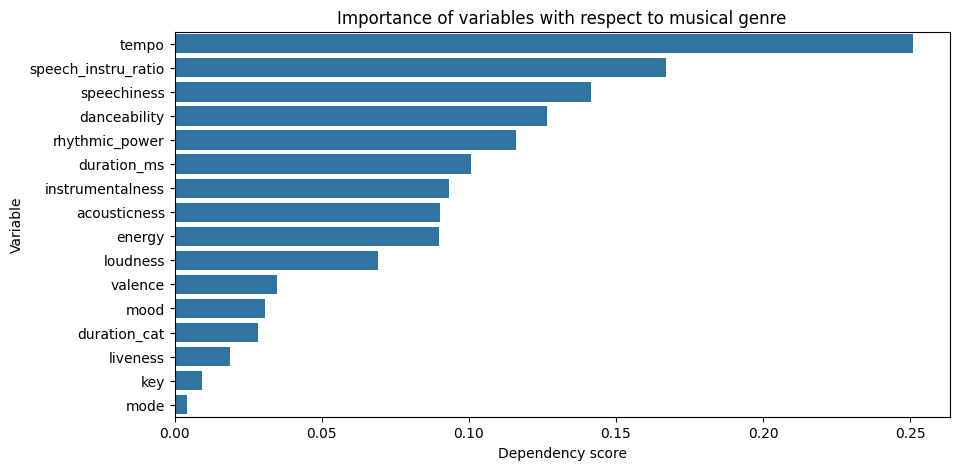

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt


#preprocessing : feature engineering

df['mood'] = df['energy'] * df['valence']
df['rhythmic_power'] = df['energy'] * df['tempo']
df['speech_instru_ratio'] = df['speechiness'] / (df['instrumentalness'] + 0.0001)
df['duration_cat'] = pd.cut(
    df['duration_ms'],
    bins=[0, 180000, 300000, 6000000], #(0s, 3min,5min, le reste)
    labels=[0, 1, 2]  # 0=Court, 1=Standard, 2=Long
).astype(int)


# Keep only usefull columns
num_cols = ['danceability', 'energy','key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms', 'mood', 'rhythmic_power', 'speech_instru_ratio','duration_cat'
            ]




# Delete lines where informations are missing
df = df.dropna(subset=num_cols + ['playlist_genre'])

# Encode the column 'playlist_genre' in numeric
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['playlist_genre'])
# Non linear correlation
X = df[num_cols]
y = df['genre_encoded']

mi = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi, index=num_cols).sort_values(ascending=False)




print("Correlation between features and genres :")
print(mi_series)

# ✅ Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=mi_series, y=mi_series.index)
plt.title("Importance of variables with respect to musical genre")
plt.xlabel("Dependency score")
plt.ylabel("Variable")
plt.show()

In [13]:
df.describe()


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,mood,rhythmic_power,speech_instru_ratio,duration_cat,genre_encoded
count,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000
mean,40.295750,0.654848,0.691662,5.372518,-6.880033,0.569087,0.110334,0.184927,0.080804,0.189748,0.518946,120.542423,222752.987078,0.366745,84.122053,742.906285,0.889575,2.672994
std,23.617965,0.146487,0.184800,3.616711,3.049095,0.495213,0.104758,0.226564,0.218756,0.154021,0.232560,27.576505,54149.258419,0.200269,31.239711,1040.687647,0.523559,1.613151
min,0.000000,0.077100,0.000175,0.000000,-46.448000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,35.477000,31429.000000,0.000002,0.029586,0.024325,0.000000,0.000000
25%,23.000000,0.562000,0.570000,2.000000,-8.367000,0.000000,0.040800,0.016400,0.000000,0.092800,0.339000,98.262000,187147.500000,0.205837,62.014203,14.663610,1.000000,1.000000
50%,43.000000,0.672000,0.714000,6.000000,-6.323000,1.000000,0.063600,0.087700,0.000015,0.127000,0.523000,120.046000,216320.000000,0.351948,81.991734,358.546169,1.000000,3.000000
75%,59.000000,0.762000,0.837000,9.000000,-4.766000,1.000000,0.139000,0.274000,0.004290,0.247000,0.702000,134.998000,252800.000000,0.511756,105.851565,909.000000,1.000000,4.000000
max,100.000000,0.981000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.994000,0.991000,239.440000,419500.000000,0.965196,198.474380,9180.000000,2.000000,5.000000


In [14]:
features = ['danceability', 'energy','key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms', 'mood', 'rhythmic_power', 'speech_instru_ratio','duration_cat'
            ]
target='playlist_genre'

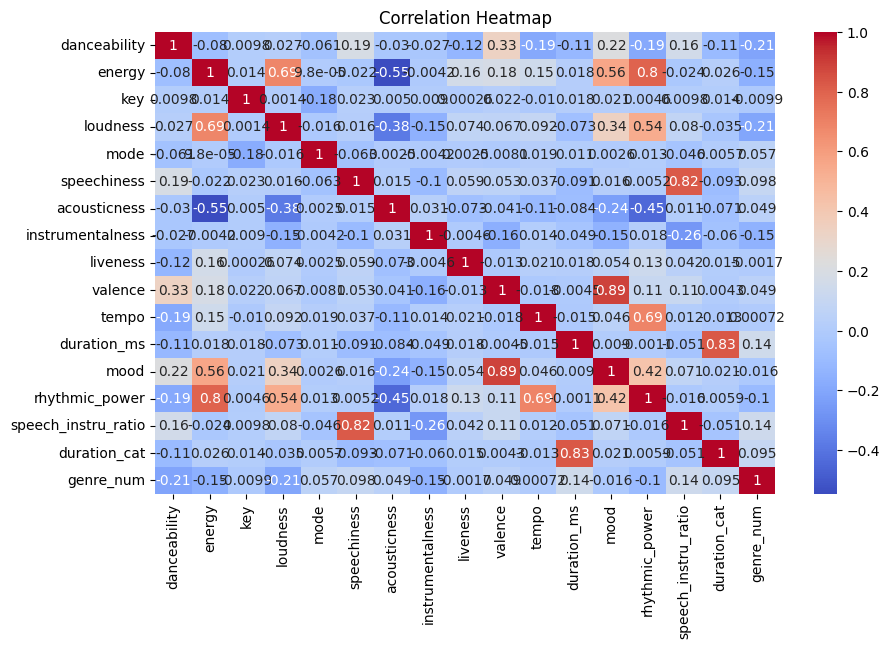

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['genre_num'] = le.fit_transform(df['playlist_genre'])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[features + ['genre_num']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

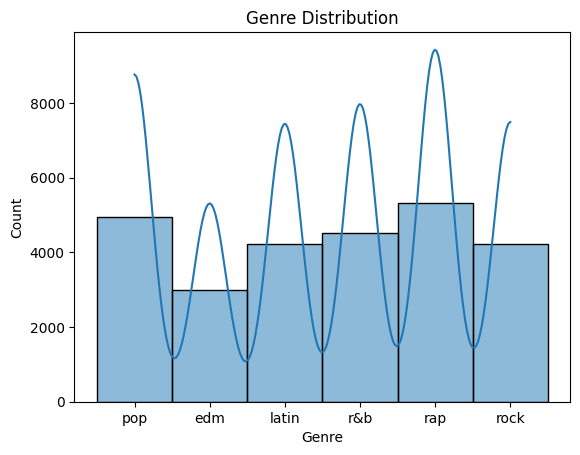

In [16]:
sns.histplot(df['playlist_genre'], bins=30, kde=True)
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

# Training

In [17]:
X = df[features]
y = df['genre_num']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(n_estimators=200, random_state=42)

# **Prediction**

In [20]:
y_pred = model.predict(X_test)


In [25]:
display(y_pred)

array([3, 1, 2, ..., 5, 0, 2])

In [27]:
# Afficher l'équivalence chiffre → genre
mapping = {i: genre for i, genre in enumerate(le.classes_)}
print("\nÉquivalence chiffre → genre :")
for num, genre in mapping.items():
    print(f"{num} → {genre}")


Équivalence chiffre → genre :
0 → edm
1 → latin
2 → pop
3 → r&b
4 → rap
5 → rock


In [34]:
def get_features_by_track_id(df, track_id, feature_columns):
    row = df[df['track_id'] == track_id]
    if row.empty:
        return None  # track_id non trouvé
    # Sélection uniquement des colonnes features
    features_dict = row[feature_columns].iloc[0].to_dict()
    return features_dict

In [35]:
get_features_by_track_id(df,'3eekarcy7kvN4yt5ZFzltW',num_cols)

{'danceability': 0.598,
 'energy': 0.427,
 'key': 7.0,
 'loudness': -8.764,
 'mode': 0.0,
 'speechiness': 0.0317,
 'acousticness': 0.0546,
 'instrumentalness': 5.83e-06,
 'liveness': 0.21,
 'valence': 0.0605,
 'tempo': 76.469,
 'duration_ms': 175721.0,
 'mood': 0.0258335,
 'rhythmic_power': 32.652263,
 'speech_instru_ratio': 299.53699329112726,
 'duration_cat': 0.0}

In [42]:
import numpy as np
import pandas as pd

# Ton dictionnaire
track_features = {'danceability': 0.5531472859615902, 'energy': 0.8755669103529218, 'key': 2.8, 'loudness': -13.685795599687227, 'mode': 0.0, 'speechiness': 0.019477854237186575, 'acousticness': 0.059361057783767254, 'instrumentalness': 4.9471128116646045e-06, 'liveness': 0.22702814902710808, 'valence': 0.04585802304010202, 'tempo': 76.4689999985046, 'duration_ms': 174949.5317802476, 'mood': 0.04015176754811523, 'rhythmic_power': 58.39080698600752, 'speech_instru_ratio': 471.95202796116797, 'duration_cat': 'short'}


# 1. Convertir tempo en float
track_features['tempo'] = float(track_features['tempo'])

# 2. Convertir duration_cat en numérique si nécessaire
# Exemple : short=0, medium=1, long=2
duration_mapping = {'short': 0, 'medium': 1, 'long': 2}
track_features['duration_cat'] = duration_mapping[track_features['duration_cat']]

# 3. Créer un DataFrame avec une seule ligne
X_new = pd.DataFrame([track_features])

# 4. Faire la prédiction
y_pred_new = model.predict(X_new)
display(y_pred_new)


array([5])

Multiclass Model Evaluation :
Accuracy  : 0.571
Precision : 0.567
Recall    : 0.571
F1-score  : 0.564
Full Classification Report
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       592
           1       0.56      0.37      0.45       867
           2       0.44      0.47      0.46       996
           3       0.51      0.45      0.48       913
           4       0.62      0.75      0.68      1059
           5       0.65      0.75      0.70       820

    accuracy                           0.57      5247
   macro avg       0.58      0.57      0.57      5247
weighted avg       0.57      0.57      0.56      5247



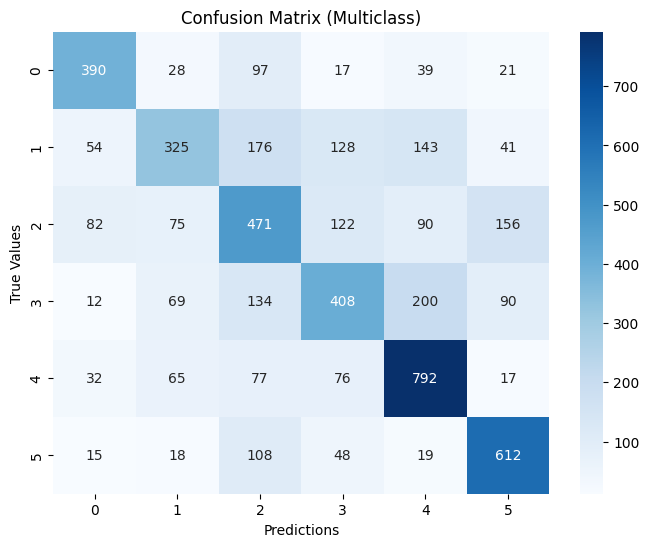

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediction
# y_pred = np.argmax(y_pred_proba, axis=1)  # keep the most probable class




# Global score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Multiclass Model Evaluation :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")

print("Full Classification Report")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Multiclass)")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.show()

In [23]:
from xgboost import XGBClassifier
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,

    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("XGB before pipeline Evaluation :")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")

Accuracy: 0.5713741185439298
XGB before pipeline Evaluation :
Precision : 0.567
Recall    : 0.571
F1-score  : 0.564


In [24]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

preprocess = ColumnTransformer([
    ('scale', StandardScaler(), features)
])

# Pipeline
pipe = Pipeline([
    ('prep', preprocess),
    ('xgb', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='mlogloss',
        random_state=42
    ))
])

# Train
pipe.fit(X_train, y_train)

# Prediction
y_pred = pipe.predict(X_test)

# Score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("XGB Model Evaluation :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")


KeyboardInterrupt: 

We see that XGB is better without using a pipeline.

We scal the features to try KNN and SVM model.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
X_scaled = pd.DataFrame(X_scaled, columns=features)

for col in features:
    plt.figure(figsize=(10,5))
    plt.hist(df[col].dropna(), bins=30, color="orange")
    plt.title(f"Distribution BEFORE scaling - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,5))
    plt.hist(X_scaled[col].dropna(), bins=30, color="orange")
    plt.title(f"Distribution AFTER scaling - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()



In [ ]:
y_pred = pipe.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("📊 Multiclass Model Evaluation :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")

In [ ]:
from sklearn.svm import SVC
# Preprocessing = StandardScaler
preprocess = ColumnTransformer([
    ('scale', StandardScaler(), features)
])

svm_model = Pipeline([
    ('prep', preprocess),
    ('svm', SVC(kernel='rbf', C=3, gamma='scale'))
])

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("SVM Model Evaluation :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = Pipeline([
    ('prep', preprocess),
    ('knn', KNeighborsClassifier(n_neighbors=7, weights='distance'))
])

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("KNN Model Evaluation :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")

After trying RandomForest, XGBoost, SVM and KNN, we conclude that the best model for this dataset is the RandomForest classifier. Now we are going to try a gridSearch on this model.


In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [200],
    'max_depth': [10, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_fast = GridSearchCV(
    rf,
    params,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

grid_fast.fit(X_train, y_train)

print("🔍 Best RF score:", grid_fast.best_score_)
print("🏆 Best RF params:", grid_fast.best_params_)

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [200, 400],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(
    rf,
    params,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

grid.fit(X_train, y_train)

print("Best score:", grid.best_score_)
print("Best params:", grid.best_params_)

Regarder sur les types les plus prédits si le model est efficace et développer par rapport à ca. essayer d'extraire certains patern et un max de features (par ex niveau du bpm, tempo) pour améliorer rf